This notebook is based on: https://esciencecenter-digital-skills.github.io/geospatial-python/06-raster-intro.html

In [1]:
import rioxarray


Explain relationship rioxarray xarray rastterio pyproj and numpy

In [29]:
!pip show rioxarray

Name: rioxarray
Version: 0.15.1
Summary: geospatial xarray extension powered by rasterio
Home-page: https://github.com/corteva/rioxarray
Author: rioxarray Contributors
Author-email: 
License: Apache
Location: c:\miniconda3\envs\geospatial\lib\site-packages
Requires: numpy, packaging, pyproj, rasterio, xarray
Required-by: 


In [28]:
rioxarray.open_rasterio?

Signature:
rioxarray.open_rasterio(
    filename: Union[str, os.PathLike, rasterio.io.DatasetReader, rasterio.vrt.WarpedVRT, rioxarray._io.SingleBandDatasetReader],
    parse_coordinates: Optional[bool] = None,
    chunks: Union[int, tuple, dict, NoneType] = None,
    cache: Optional[bool] = None,
    lock: Optional[Any] = None,
    masked: bool = False,
    mask_and_scale: bool = False,
    variable: Union[str, list[str], tuple[str, ...], NoneType] = None,
    group: Union[str, list[str], tuple[str, ...], NoneType] = None,
    default_name: Optional[str] = None,
    decode_times: bool = True,
    decode_timedelta: Optional[bool] = None,
    band_as_variable: bool = False,
    **open_kwargs,
) -> Union[xarray.core.dataset.Dataset, xarray.core.dataarray.DataArray, list[xarray.core.dataset.Dataset]]
Docstring:
Open a file with rasterio (experimental).

This should work with any file that rasterio can open (most often:
geoTIFF). The x and y coordinates are generated automatically from the

In [ ]:
red = rioxarray.open_rasterio('../data/input_data/sentinel2/red.tif')

In [4]:
red

<xarray.DataArray (band: 1, y: 10980, x: 10980)> Size: 241MB
[120560400 values with dtype=uint16]
Coordinates:
  * band         (band) int32 4B 1
  * x            (x) float64 88kB 5e+05 5e+05 5e+05 ... 6.098e+05 6.098e+05
  * y            (y) float64 88kB 4.1e+06 4.1e+06 4.1e+06 ... 3.99e+06 3.99e+06
    spatial_ref  int32 4B 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

In [5]:
red.values

array([[[ 0,  0,  0, ..., 57, 43, 44],
        [ 0,  0,  0, ..., 61, 24, 19],
        [ 0,  0,  0, ..., 22,  1,  1],
        ...,
        [ 0,  0,  0, ...,  1,  1,  1],
        [ 0,  0,  0, ...,  1,  1,  1],
        [ 0,  0,  0, ...,  1,  1,  1]]], dtype=uint16)

In [35]:
print(red.max())
print(red.min())

<xarray.DataArray ()> Size: 2B
array(23384, dtype=uint16)
Coordinates:
    spatial_ref  int32 4B 0
<xarray.DataArray ()> Size: 2B
array(0, dtype=uint16)
Coordinates:
    spatial_ref  int32 4B 0


In [38]:
print(red.rio.crs)

EPSG:32635


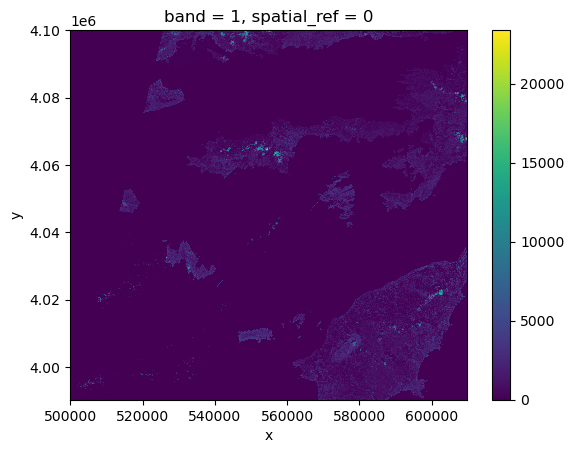

In [39]:
red.plot()

In [ ]:
red_lowres = rioxarray.open_rasterio('../data/input_data/sentinel2/red.tif', overview_level=2)

In [59]:
red_lowres

<xarray.DataArray (band: 1, y: 1373, x: 1373)> Size: 4MB
[1885129 values with dtype=uint16]
Coordinates:
  * band         (band) int32 4B 1
  * x            (x) float64 11kB 5e+05 5.001e+05 ... 6.097e+05 6.097e+05
  * y            (y) float64 11kB 4.1e+06 4.1e+06 4.1e+06 ... 3.99e+06 3.99e+06
    spatial_ref  int32 4B 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

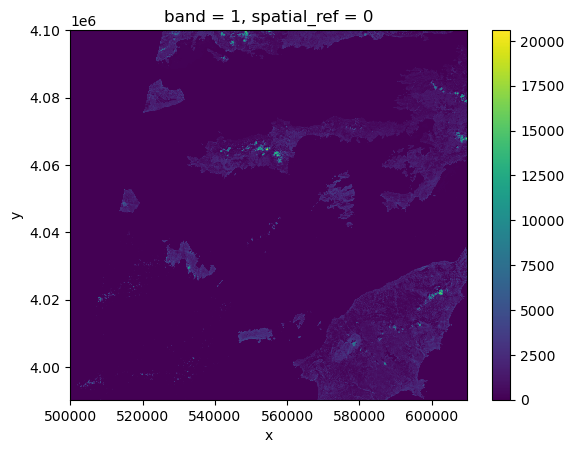

In [60]:
red_lowres.plot()

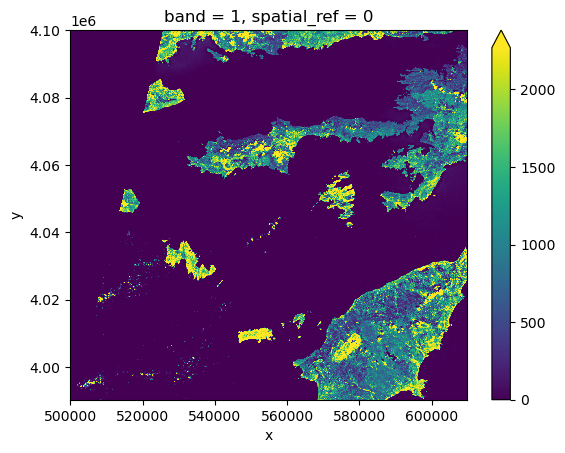

In [61]:
red_lowres.plot(robust=True)

## View Raster Coordinate Reference System (CRS) in Python

In [62]:
red.rio.crs

CRS.from_epsg(32635)

In [63]:
epsg = red.rio.crs.to_epsg()
epsg 

32635

In [64]:
from pyproj import CRS
crs = CRS(epsg)
crs

<Projected CRS: EPSG:32635>
Name: WGS 84 / UTM zone 35N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 24°E and 30°E, northern hemisphere between equator and 84°N, onshore and offshore. Belarus. Bulgaria. Central African Republic. Democratic Republic of the Congo (Zaire). Egypt. Estonia. Finland. Greece. Latvia. Lesotho. Libya. Lithuania. Moldova. Norway. Poland. Romania. Russian Federation. Sudan. Svalbard. Türkiye (Turkey). Uganda. Ukraine.
- bounds: (24.0, 0.0, 30.0, 84.0)
Coordinate Operation:
- name: UTM zone 35N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Dealing with Missing Data

In [ ]:
red_nodata = rioxarray.open_rasterio('../data/input_data/sentinel2/red.tif', masked=True, overview_level=2)

In [16]:
red_nodata

<xarray.DataArray (band: 1, y: 1373, x: 1373)> Size: 8MB
[1885129 values with dtype=float32]
Coordinates:
  * band         (band) int32 4B 1
  * x            (x) float64 11kB 5e+05 5.001e+05 ... 6.097e+05 6.097e+05
  * y            (y) float64 11kB 4.1e+06 4.1e+06 4.1e+06 ... 3.99e+06 3.99e+06
    spatial_ref  int32 4B 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    scale_factor:        1.0
    add_offset:          0.0

In [17]:
red_lowres.where(red_lowres != red_lowres.rio.nodata)

<xarray.DataArray (band: 1, y: 1373, x: 1373)> Size: 8MB
array([[[nan, nan, nan, ..., 27., 32., 38.],
        [nan, nan, nan, ..., 26., 39., 45.],
        [nan, nan, nan, ..., 11., 25., 36.],
        ...,
        [nan, nan, nan, ...,  1.,  1.,  1.],
        [nan, nan, nan, ...,  1.,  1.,  1.],
        [nan, nan, nan, ...,  1.,  1.,  1.]]], dtype=float32)
Coordinates:
  * band         (band) int32 4B 1
  * x            (x) float64 11kB 5e+05 5.001e+05 ... 6.097e+05 6.097e+05
  * y            (y) float64 11kB 4.1e+06 4.1e+06 4.1e+06 ... 3.99e+06 3.99e+06
    spatial_ref  int32 4B 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

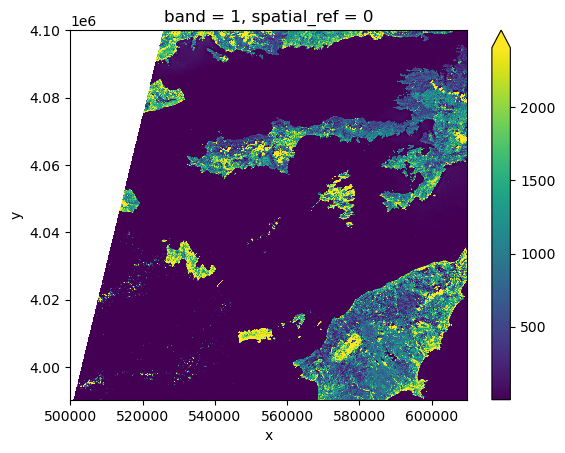

In [48]:
red_nodata.plot(robust=True)

## Raster Bands

In [ ]:
visual_lowres = rioxarray.open_rasterio('../data/input_data/sentinel2/visual.tif', overview_level=2)
visual_lowres

<xarray.DataArray (band: 3, y: 1373, x: 1373)> Size: 6MB
[5655387 values with dtype=uint8]
Coordinates:
  * band         (band) int32 12B 1 2 3
  * x            (x) float64 11kB 5e+05 5.001e+05 ... 6.097e+05 6.097e+05
  * y            (y) float64 11kB 4.1e+06 4.1e+06 4.1e+06 ... 3.99e+06 3.99e+06
    spatial_ref  int32 4B 0
Attributes:
    AREA_OR_POINT:       Area
    OVR_RESAMPLING_ALG:  AVERAGE
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0

In [66]:
visual_lowres.shape

(3, 1373, 1373)

(array([4443900.,  259991.,  269981.,  204256.,  154983.,  108035.,
          77961.,   51288.,   36562.,   48430.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

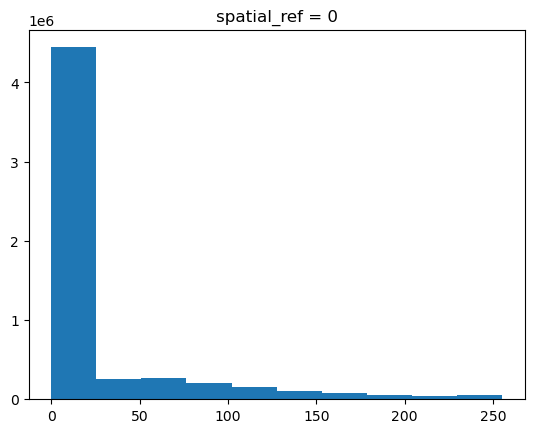

In [68]:
visual_lowres.plot()

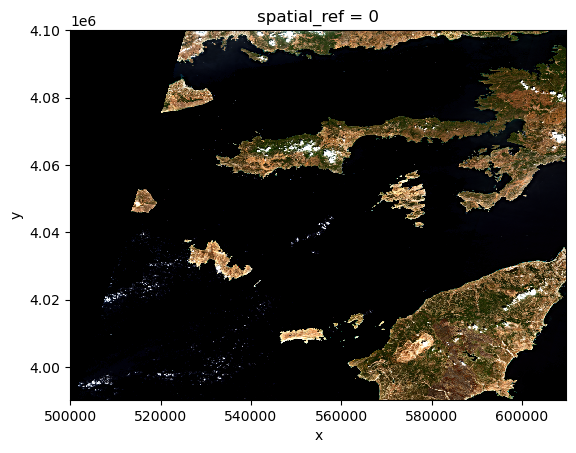

In [69]:
visual_lowres.plot.imshow()